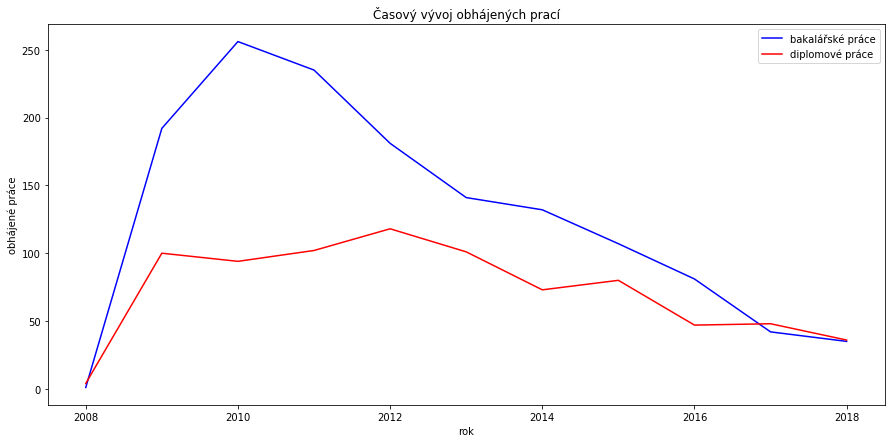

In [177]:
#Časový vývoj (po rocích) počtu obhájených prací (vč. rozlišení jejich typu).

import pandas as pd
import matplotlib.pyplot as plt # takto se matplotlib standardně importuje
import matplotlib

%matplotlib inline 

data = pd.read_csv('finalData.csv', sep='%')
data = data.dropna()

mgr_data = data[data['type'] == 'mgr']
bc_data = data[data['type'] == 'bc']

mgr_years = mgr_data['year'].value_counts().sort_index()
bc_years = bc_data['year'].value_counts().sort_index()

#display(mgr_years)
#display(bc_years)

ax = bc_years.plot(title='Časový vývoj obhájených prací',figsize = (15,7),label="bakalářské práce",color='Blue', legend = True)
mgr_years.plot(label='diplomové práce', color='Red', ax = ax, legend = True)

ax.set_ylabel('obhájené práce')
ax.set_xlabel('rok')

plt.show()


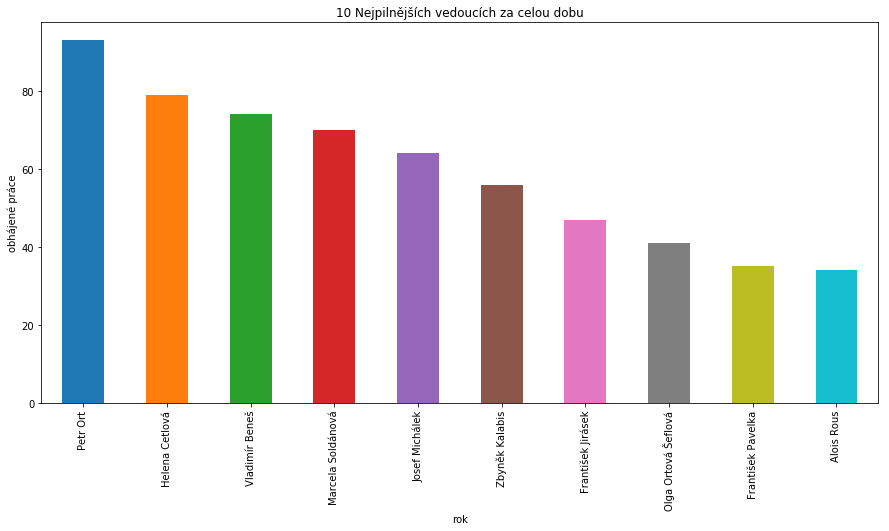

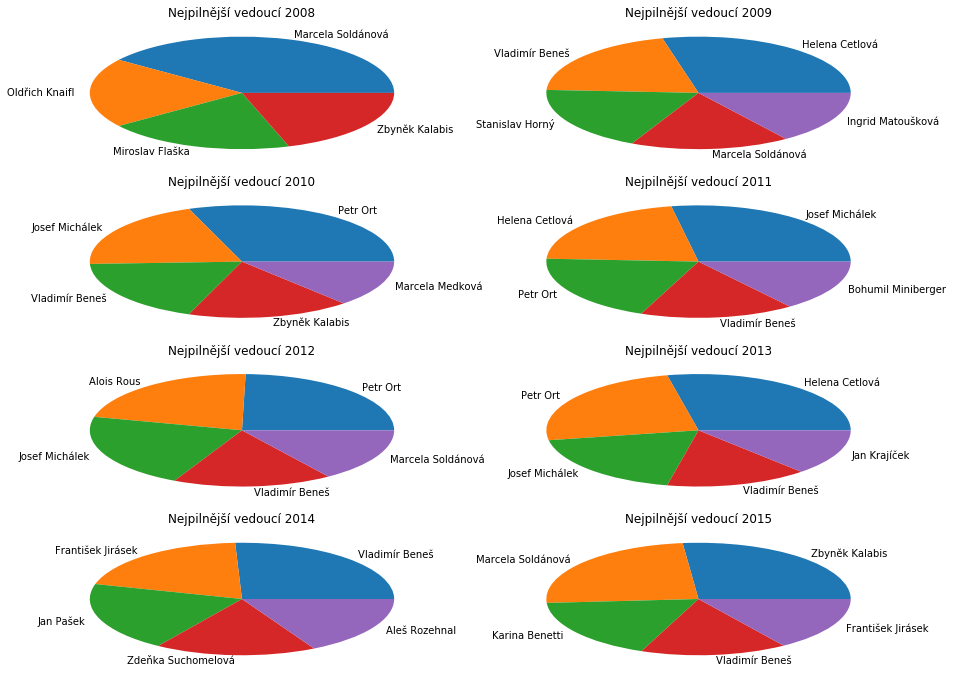

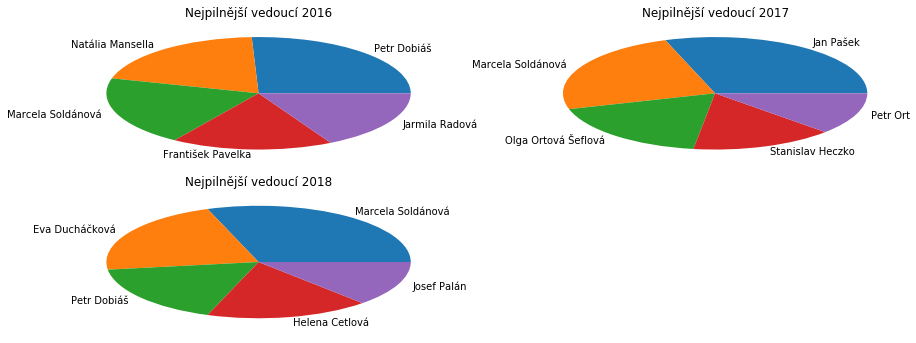

In [132]:
#Nejpilnější vedoucí (počet vedených prací na rok, za celou dobu atp.).

from math import floor
recorded_years = data["year"].sort_values().unique()
tmpData = []

for i in range(0,len(recorded_years)):
    tmp = data["vedouci"][data["year"] == recorded_years[i]].value_counts()
    tmpData.append(tmp)


allTimeNejpilnejsiVedouci = data["vedouci"].value_counts()[:10]

ax = allTimeNejpilnejsiVedouci.plot(kind="bar",title='10 Nejpilnějších vedoucích za celou dobu',figsize = (15,7))

ax.set_ylabel('Vedené práce')
ax.set_xlabel('Vedoucí')

    
plt.figure(figsize=(40,150));
tmp = floor(len(recorded_years)/2)*100+20;
cnt = 0;
for i in range(0,len(recorded_years)):
    cnt += 1;
    #do another figure when there are too many sublplots
    if( cnt > 8):
        plt.figure(figsize=(40,150));
        cnt = 1;
        
    plt.subplot(tmp+cnt)
    finalData = tmpData[i][:5]
    finalData.name = ""
    ax = finalData.plot(kind="pie",title='Nejpilnější vedoucí '+str(recorded_years[i]),figsize = (15,15))




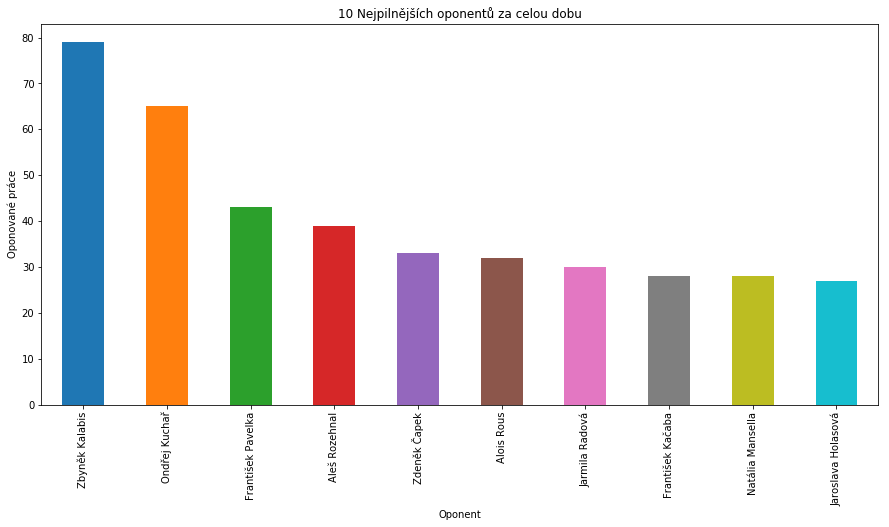

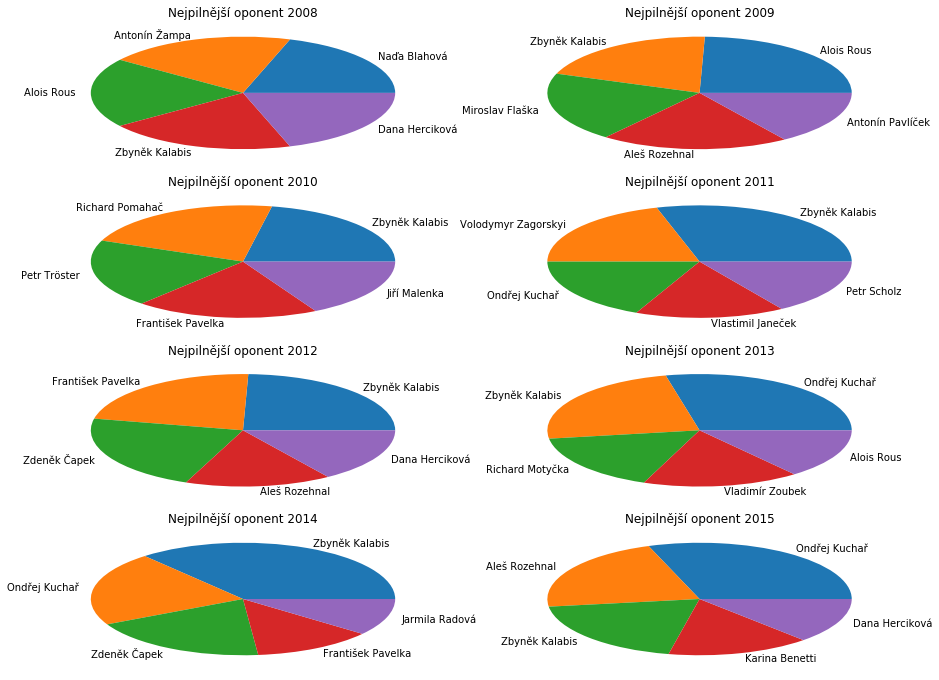

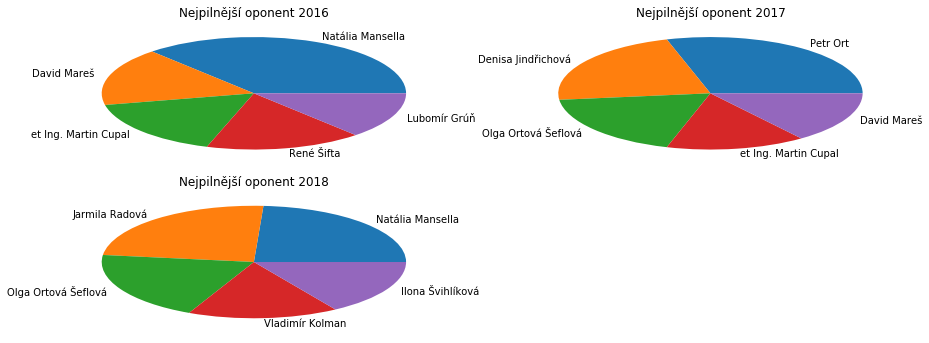

In [133]:
#To samé pro oponenty
from math import floor
recorded_years = data["year"].sort_values().unique()
tmpData = []

for i in range(0,len(recorded_years)):
    tmp = data["oponent"][data["year"] == recorded_years[i]].value_counts()
    tmpData.append(tmp)


allTimeNejpilnejsiVedouci = data["oponent"].value_counts()[:10]

ax = allTimeNejpilnejsiVedouci.plot(kind="bar",title='10 Nejpilnějších oponentů za celou dobu',figsize = (15,7))

ax.set_ylabel('Oponované práce')
ax.set_xlabel('Oponent')

    
plt.figure(figsize=(40,150));
tmp = floor(len(recorded_years)/2)*100+20;
cnt = 0;
for i in range(0,len(recorded_years)):
    cnt += 1;
    #do another figure when there are too many sublplots
    if( cnt > 8):
        plt.figure(figsize=(40,150));
        cnt = 1;
        
    plt.subplot(tmp+cnt)
    finalData = tmpData[i][:5]
    finalData.name = ""
    ax = finalData.plot(kind="pie",title='Nejpilnější oponent '+str(recorded_years[i]),figsize = (15,15))

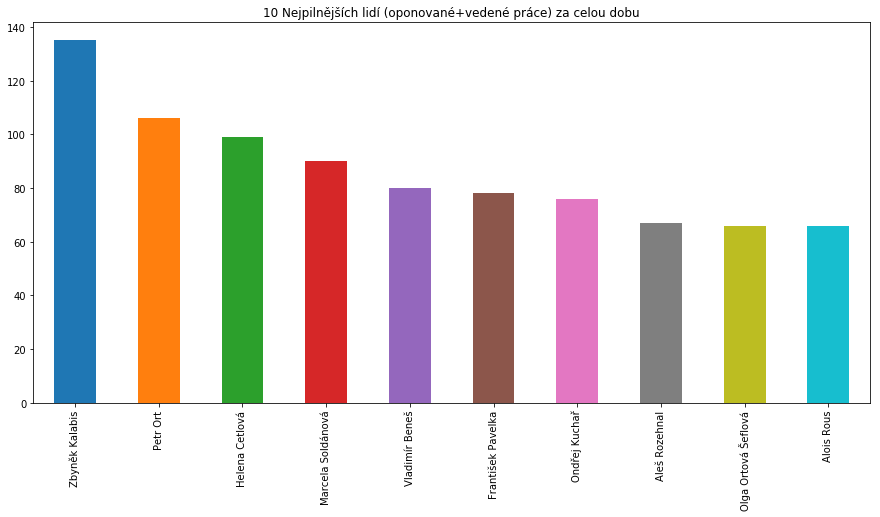

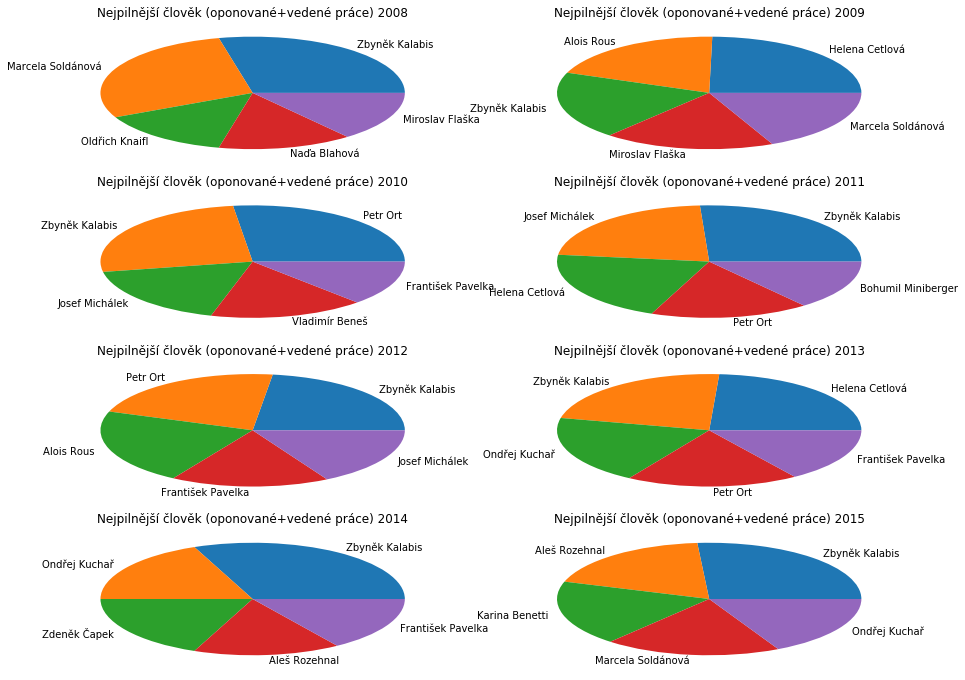

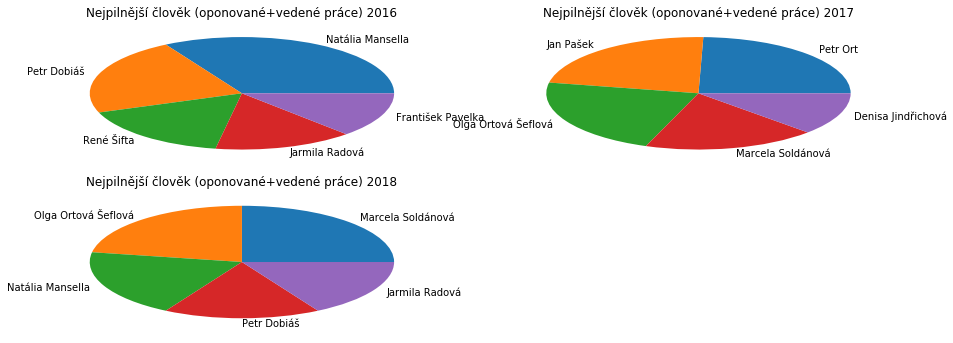

In [147]:
#A to samé pro součet vedených a oponovaných prací.
from math import floor
recorded_years = data["year"].sort_values().unique()
tmpData = []

for i in range(0,len(recorded_years)):
    tmp1 = data["oponent"][data["year"] == recorded_years[i]].value_counts()
    tmp2 = data["vedouci"][data["year"] == recorded_years[i]].value_counts()
    tmp3 = (tmp1.add(tmp2,fill_value = 0)).sort_values(ascending =False)
    tmpData.append(tmp3)


allTimeNejpilnejsiVedouci = data["oponent"].value_counts()
allTimeNejpilnejsiOponent = data["vedouci"].value_counts()
allTimeNejpilnejsiClovek = (allTimeNejpilnejsiVedouci.add(allTimeNejpilnejsiOponent,fill_value = 0)).sort_values(ascending =False)[:10]

ax = allTimeNejpilnejsiClovek.plot(kind="bar",title='10 Nejpilnějších lidí (oponované+vedené práce) za celou dobu',figsize = (15,7))
    
plt.figure(figsize=(40,150));
tmp = floor(len(recorded_years)/2)*100+20;
cnt = 0;
for i in range(0,len(recorded_years)):
    cnt += 1;
    #do another figure when there are too many sublplots
    if( cnt > 8):
        plt.figure(figsize=(40,150));
        cnt = 1;
        
    plt.subplot(tmp+cnt)
    finalData = tmpData[i][:5]
    finalData.name = ""
    ax = finalData.plot(kind="pie",title='Nejpilnější člověk (oponované+vedené práce) '+str(recorded_years[i]),figsize = (15,15))

Práce podle roku za celé období: 
prumer: 200.54545454545453
median: 205.0
min: 5
max: 350
rozptyl: 13343.87272727273
Počet prací na vedoucího za celé období: 
prumer: 6.394202898550724
median: 3.0
min: 1
max: 93
rozptyl: 122.51275699359529


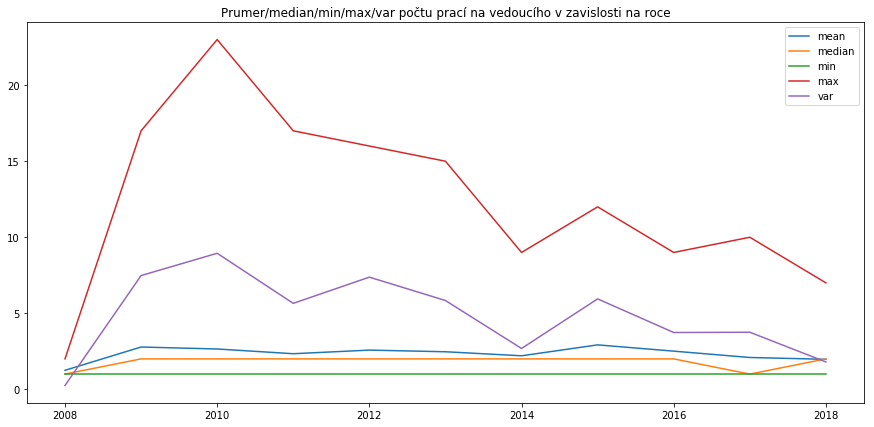

In [231]:
#Průměrný počet (medián, minimum, maximum, rozptyl) prací na vedoucího a rok a další informace o rozložení vedení prací na školitele.
print("Práce podle roku za celé období: ")

print("prumer: "+str(data["year"].value_counts().mean()))
print("median: "+str(data["year"].value_counts().median()))
print("min: "+str(data["year"].value_counts().min()))
print("max: "+str(data["year"].value_counts().max()))
print("rozptyl: "+str(data["year"].value_counts().var()))

print("Počet prací na vedoucího za celé období: ")

print("prumer: "+str(data["vedouci"].value_counts().mean()))
print("median: "+str(data["vedouci"].value_counts().median()))
print("min: "+str(data["vedouci"].value_counts().min()))
print("max: "+str(data["vedouci"].value_counts().max()))
print("rozptyl: "+str(data["vedouci"].value_counts().var()))

vedata_mean = []
vedata_median = []
vedata_min = []
vedata_max = []
vedata_var = []

for i in range(0,len(recorded_years)):
    tmpVe = data["vedouci"][data["year"] == recorded_years[i]].value_counts()
    
    vedata_mean.append(tmpVe.mean())
    vedata_median.append(tmpVe.median())
    vedata_min.append(tmpVe.min())
    vedata_max.append(tmpVe.max())
    vedata_var.append(tmpVe.var())
    
s_vedata_mean = pd.Series(index=recorded_years,data = vedata_mean)
s_vedata_median = pd.Series(index=recorded_years,data = vedata_median)
s_vedata_min = pd.Series(index=recorded_years,data = vedata_min)
s_vedata_max = pd.Series(index=recorded_years,data = vedata_max)
s_vedata_var = pd.Series(index=recorded_years,data = vedata_var)
   
ax = s_vedata_mean.plot(title='Prumer/median/min/max/var počtu prací na vedoucího v zavislosti na roce',figsize = (15,7),label="mean", legend = True)
s_vedata_median.plot(label='median', ax = ax, legend = True)
s_vedata_min.plot(label='min', ax = ax, legend = True)
s_vedata_max.plot(label='max', ax = ax, legend = True)
s_vedata_var.plot(label='var', ax = ax, legend = True)


Počet prací na vedoucího za celé období: 
prumer: 5.380487804878049
median: 3.0
min: 1
max: 79
rozptyl: 59.488126900828405
Počet prací na oponenta za celé období: 


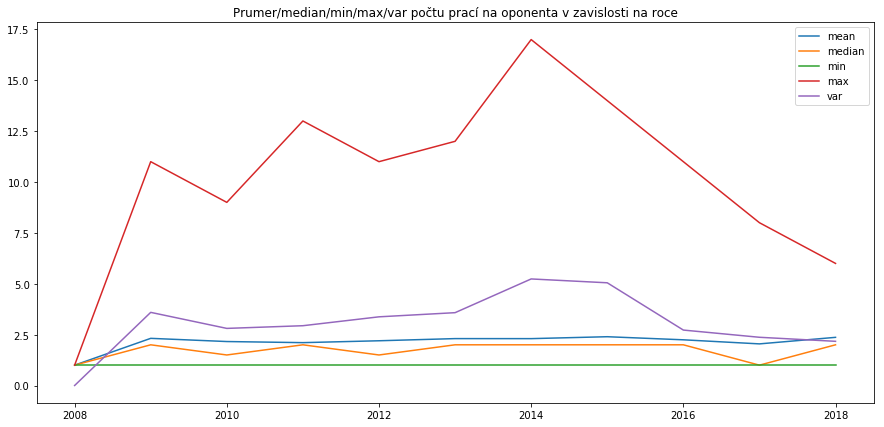

In [229]:
#Průměrný počet (medián, minimum, maximum, rozptyl) prací na oponenta a rok a další informace o rozložení vedení prací na školitele.

print("Počet prací na vedoucího za celé období: ")
print("prumer: "+str(data["oponent"].value_counts().mean()))
print("median: "+str(data["oponent"].value_counts().median()))
print("min: "+str(data["oponent"].value_counts().min()))
print("max: "+str(data["oponent"].value_counts().max()))
print("rozptyl: "+str(data["oponent"].value_counts().var()))

#Průměrný počet (medián, minimum, maximum, rozptyl) prací na vedoucího (resp. oponenta) a rok a další informace o rozložení vedení prací na školitele.
print("Počet prací na oponenta za celé období: ")


opdata_mean = []
opdata_median = []
opdata_min = []
opdata_max = []
opdata_var = []

for i in range(0,len(recorded_years)):
    tmpOp = data["oponent"][data["year"] == recorded_years[i]].value_counts()
    
    opdata_mean.append(tmpOp.mean())
    opdata_median.append(tmpOp.median())
    opdata_min.append(tmpOp.min())
    opdata_max.append(tmpOp.max())
    opdata_var.append(tmpOp.var())
    
s_opdata_mean   = pd.Series(index=recorded_years,data = opdata_mean)
s_opdata_median = pd.Series(index=recorded_years,data = opdata_median)
s_opdata_min = pd.Series(index=recorded_years,data = opdata_min)
s_opdata_max = pd.Series(index=recorded_years,data = opdata_max)
s_opdata_var = pd.Series(index=recorded_years,data = opdata_var)
    
ax = s_opdata_mean.plot(title='Prumer/median/min/max/var počtu prací na oponenta v zavislosti na roce',figsize = (15,7),label="mean", legend = True)
s_opdata_median.plot(label='median', ax = ax, legend = True)
s_opdata_min.plot(label='min', ax = ax, legend = True)
s_opdata_max.plot(label='max', ax = ax, legend = True)
s_opdata_var.plot(label='var', ax = ax, legend = True)


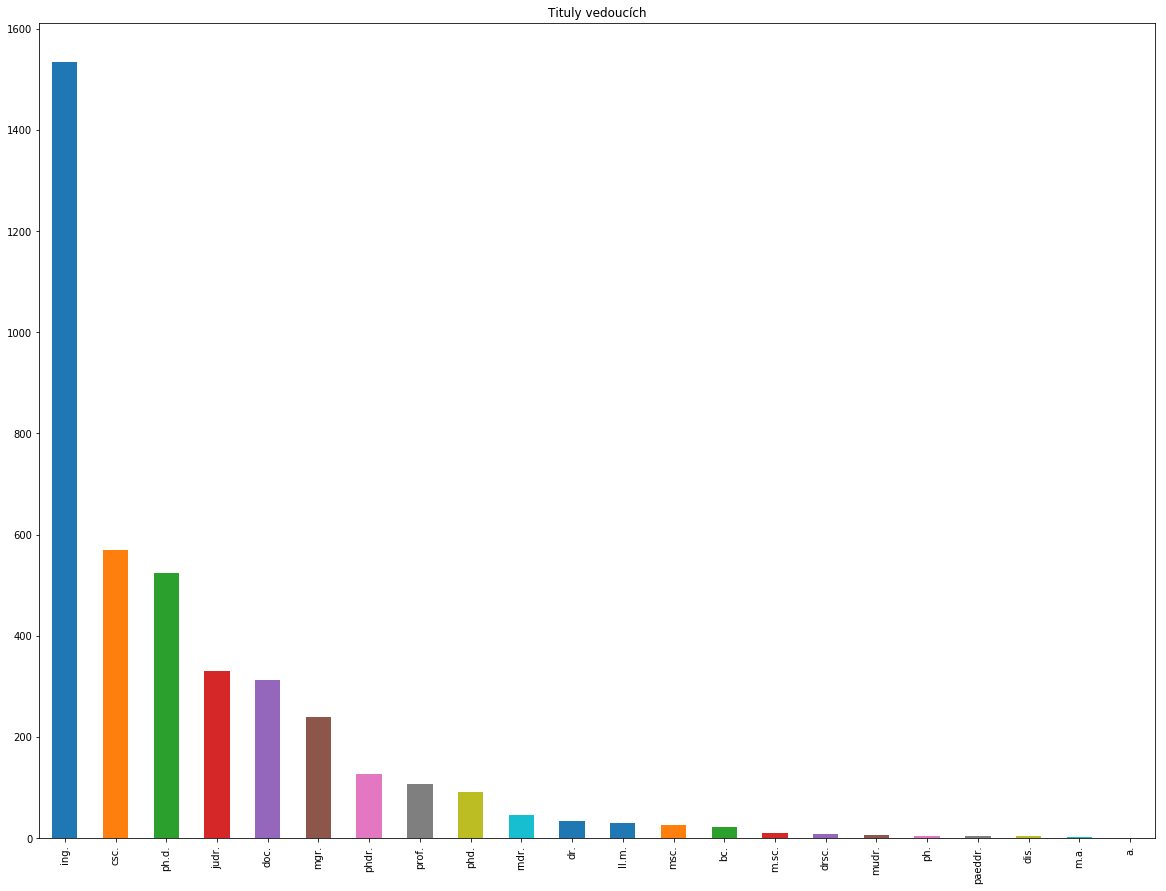

In [209]:
#Rozložení vedoucích prací podle titulů (bakalářský titul, magisterský titul, doktorský titul, docent, profesor, atp.).
vedouciTituly = []
    
nezpracovaneVedouciTituly = data["vedouciTituly"]
for i in nezpracovaneVedouciTituly:
    titles = eval(i)
    while True:
        if(titles == []):
            break;
        tmp = titles.pop()
        if(tmp == None):
            break;
        vedouciTituly.append(tmp)

df = pd.Series(vedouciTituly).value_counts()

df1.plot(kind="bar",title='Tituly vedoucích',figsize = (20,15))



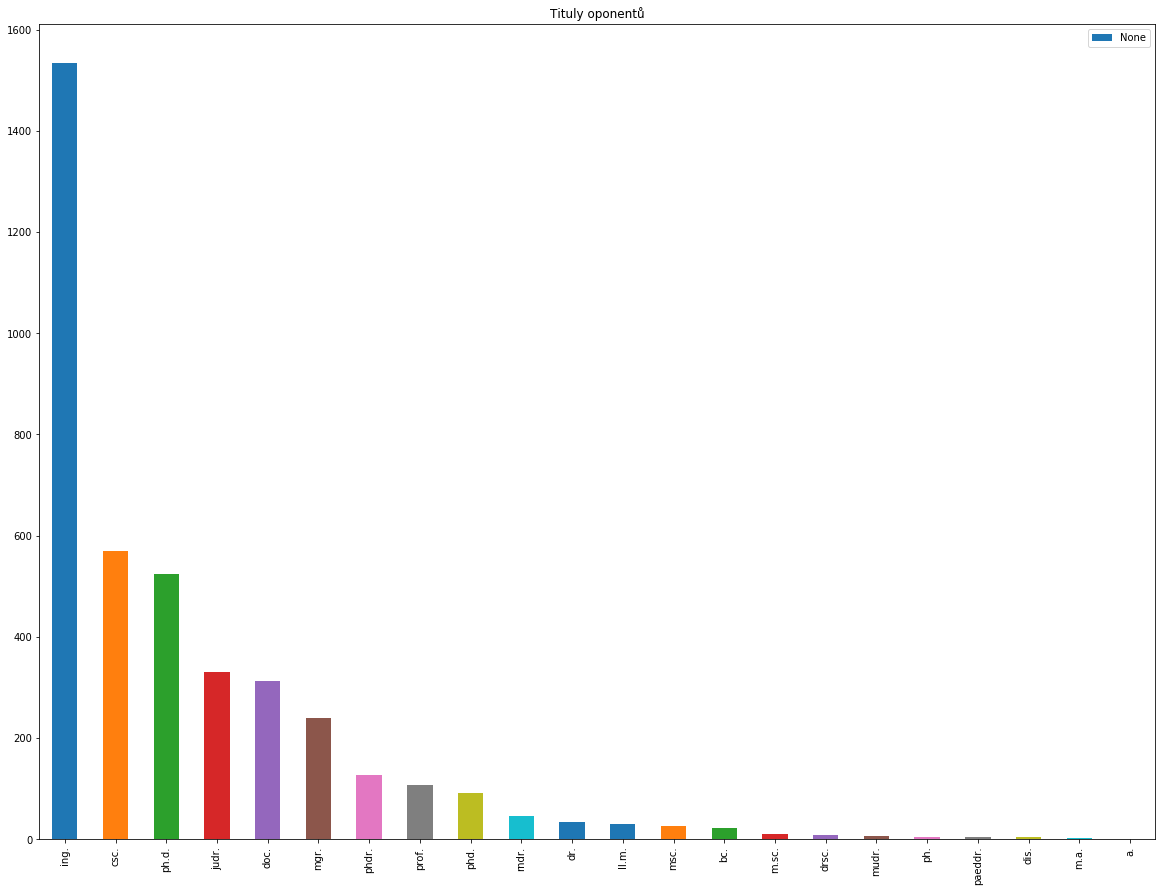

In [208]:
#Rozložení oponentů podle titulů (bakalářský titul, magisterský titul, doktorský titul, docent, profesor, atp.).
oponentTituly = []
nezpracovaneOponentTituly = data["oponentTituly"]
for i in nezpracovaneVedouciTituly:
    titles = eval(i)
    while True:
        if(titles == []):
            break;
        tmp = titles.pop()
        if(tmp == None):
            break;
        oponentTituly.append(tmp)
        
df1 = pd.Series(vedouciTituly).value_counts()

df2 = pd.Series(oponentTituly).value_counts()
df2.plot(kind="bar",title='Tituly oponentů',figsize = (20,15))